In [392]:
# Machine Learning 1 - Linear Regression Analysis 

# Importing required libraries
import numpy # used for numerical operations
import matplotlib.pyplot as mpplt # used for traditional plotting
import pandas # used to read data into tabular format
import seaborn # format plot library
%matplotlib inline 
# used to print diagrams inline within workbook

In [393]:
# Mounting Google drive to enable import of dataset 
# Running this block of code should bring up tab to login to Google Drive
#from google.colab import drive
#drive.mount("/content/gdrive")

# Dataset taken from: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
# Importing data into pandas dataframe object from csv file saved in Google drive
#housing_dataset = pandas.read_csv("/content/gdrive/MyDrive/house-prices-advanced-regression-techniques/train.csv")

# Importing data into pandas dataframe object from csv file saved in Dropbox
# I made file at this location public so may be able to run as is 
# else please import data to Google Drive or Dropbox and try importing using commented out method above or below 
housing_dataset = pandas.read_csv("https://www.dropbox.com/s/oj3ojdnec44qa0v/housingData.csv?dl=1")
housing_dataset.head() # Checking if import was successful

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [394]:
housing_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


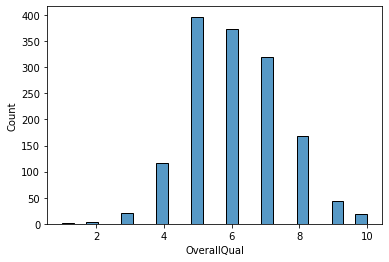

In [395]:
# Plotting histograms to visualize data distributions
seaborn.histplot(housing_dataset['OverallQual'])

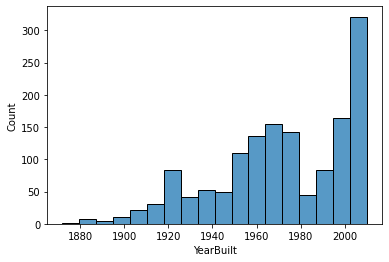

In [396]:
seaborn.histplot(housing_dataset['YearBuilt'])

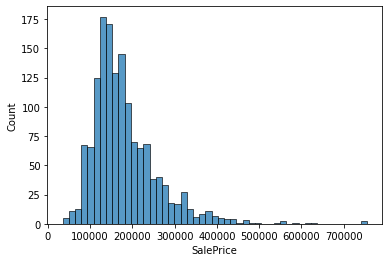

In [397]:
seaborn.histplot(housing_dataset['SalePrice'])

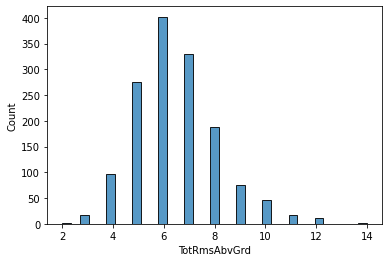

In [398]:
seaborn.histplot(housing_dataset['TotRmsAbvGrd'])

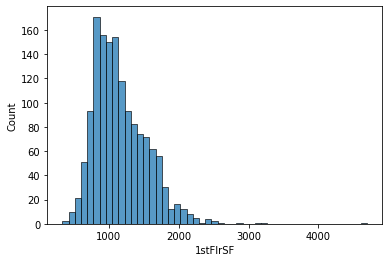

In [399]:
seaborn.histplot(housing_dataset['1stFlrSF'])

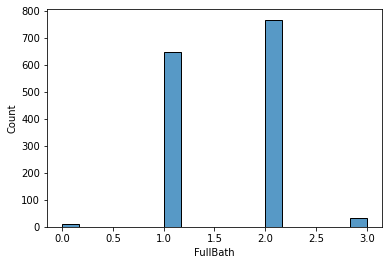

In [400]:
seaborn.histplot(housing_dataset['FullBath'])

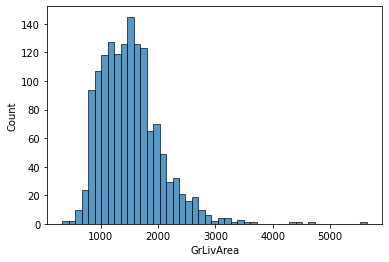

In [401]:
seaborn.histplot(housing_dataset['GrLivArea'])

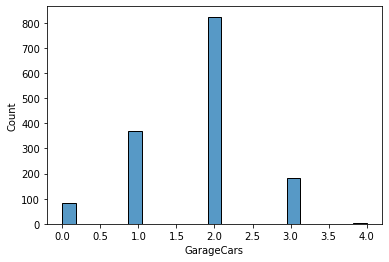

In [402]:
seaborn.histplot(housing_dataset['GarageCars'])

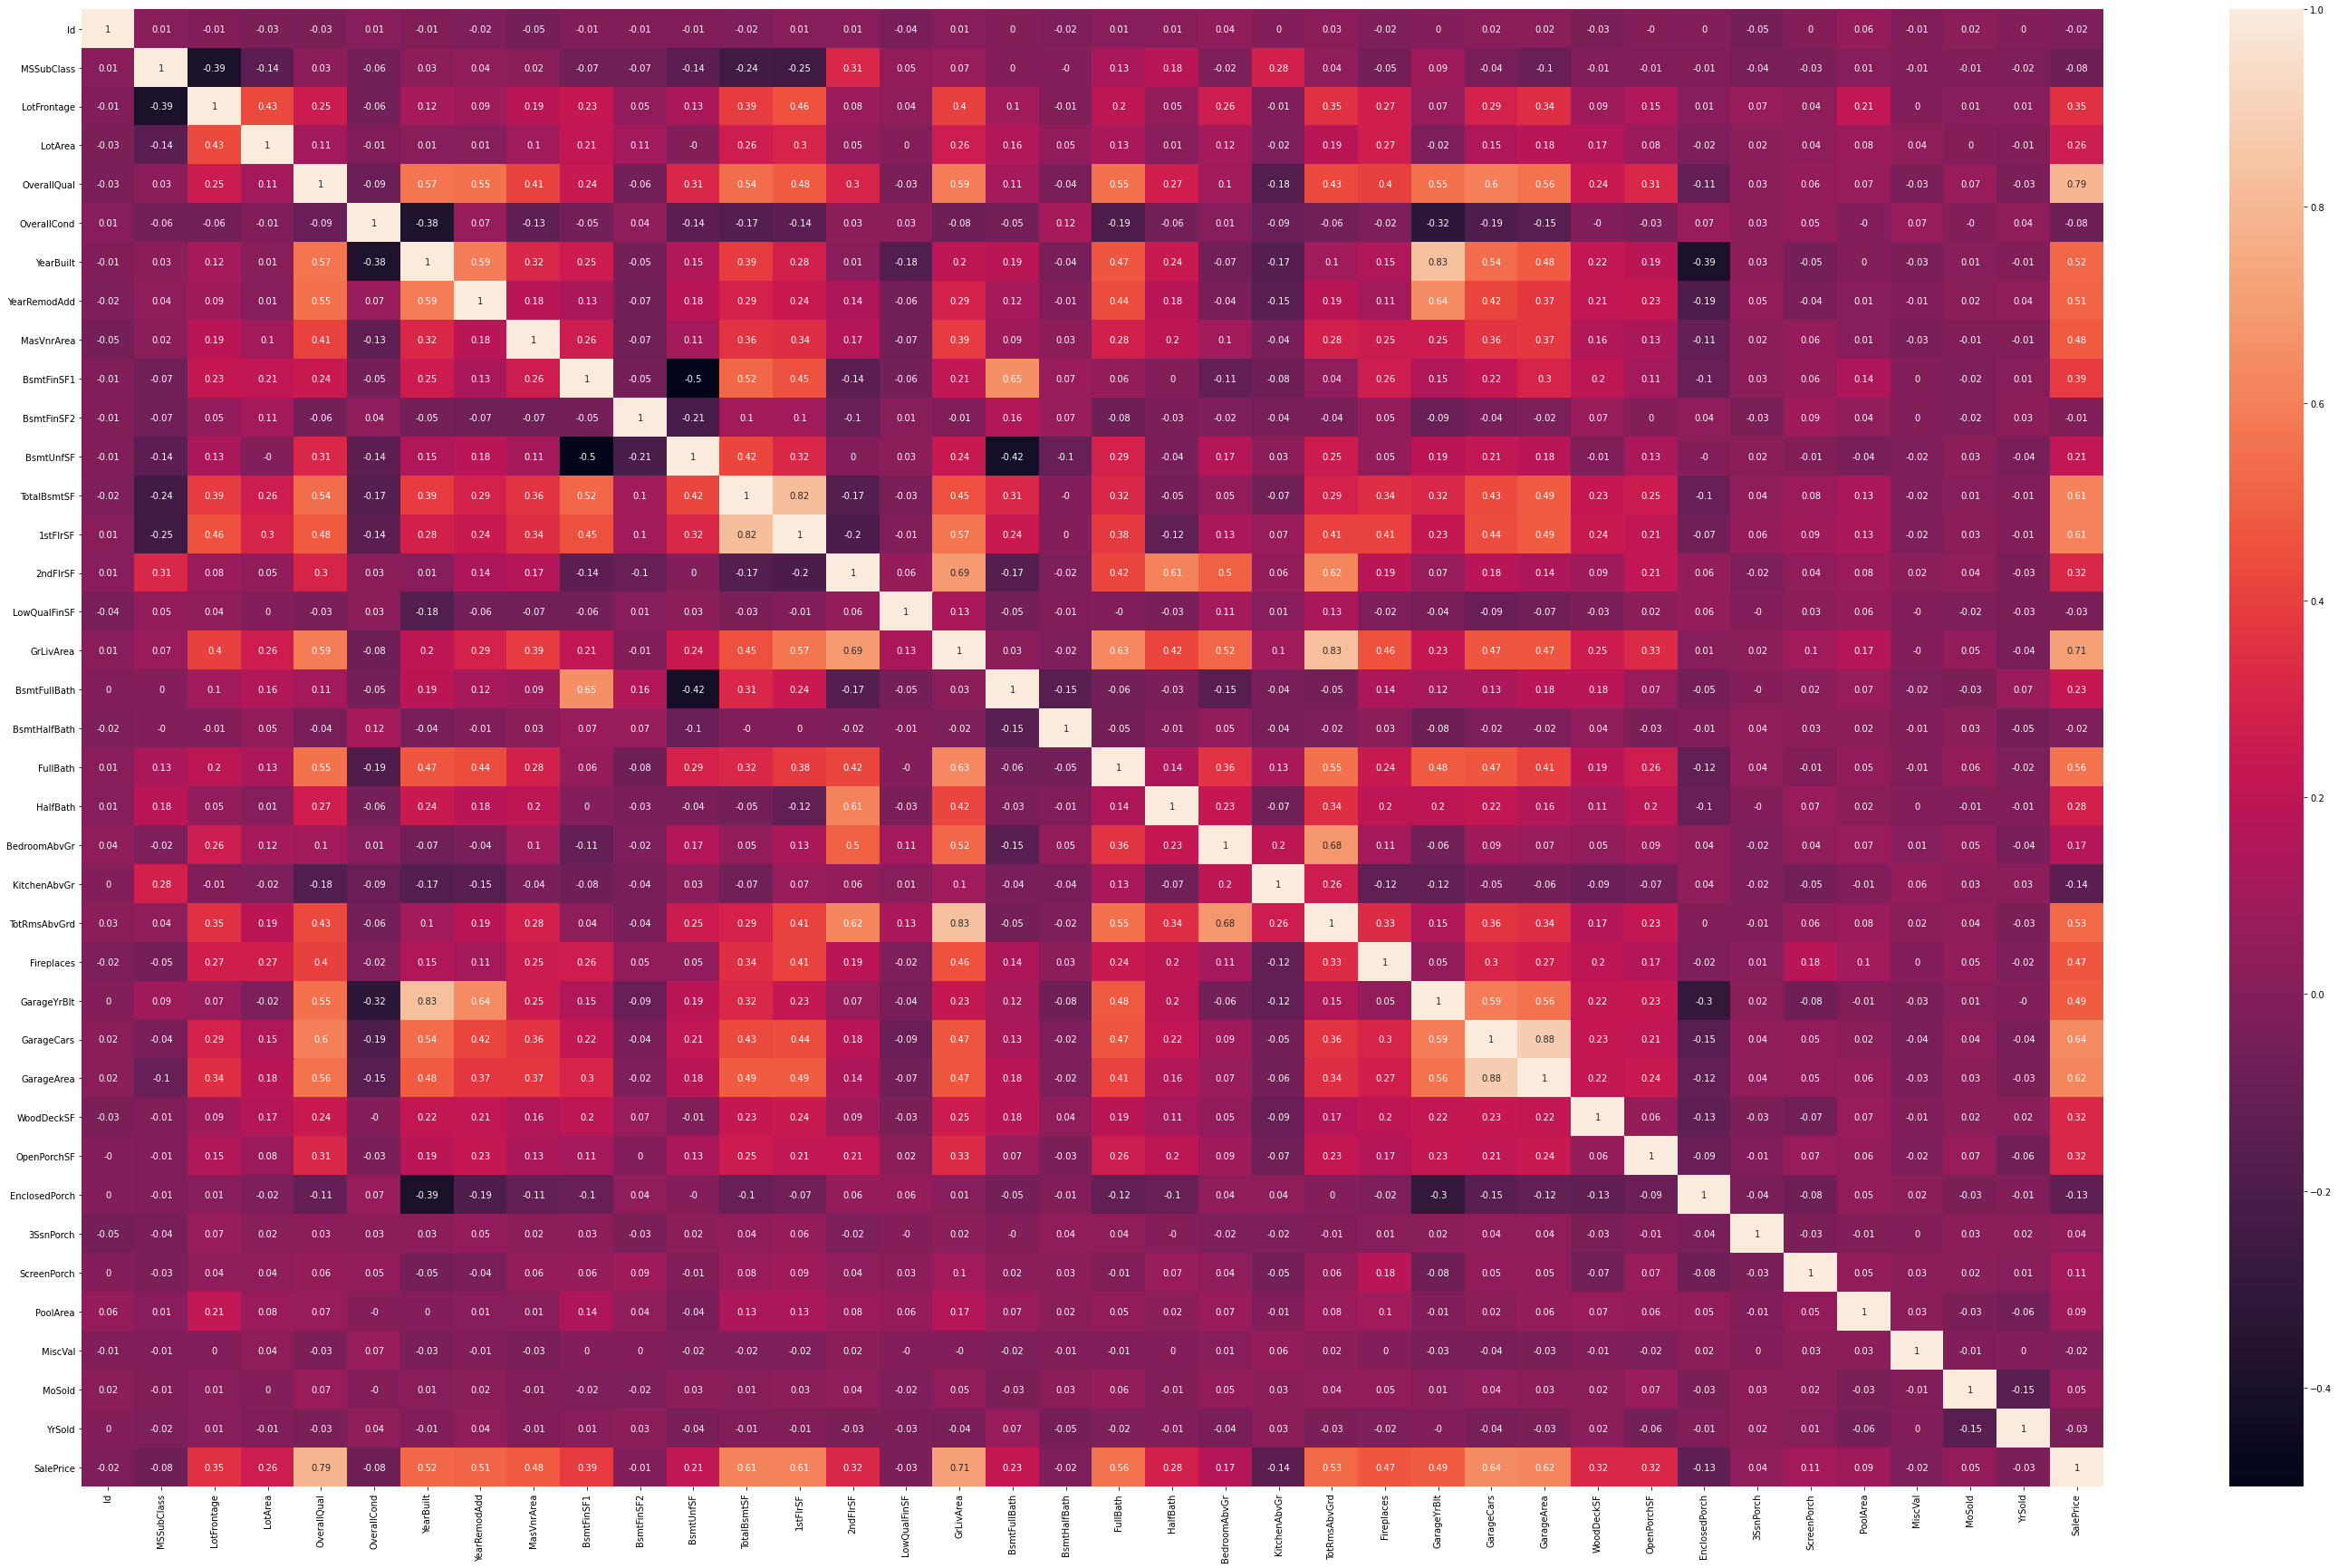

In [403]:
# Preliminary analysis - identifying correlation between available variables and sale price
DF_housingData = pandas.DataFrame(housing_dataset, columns=housing_dataset.columns)
correlation_matrix = DF_housingData.corr().round(2)
mpplt.figure(figsize=(50,30))
seaborn.heatmap(data=correlation_matrix, annot=True)

In [404]:
# Checking count of nulls to see if any data preprocessing required to have meaningful data
pandas.set_option('display.max_rows', None)
DF_housingData.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [405]:
DF_housingData['SalePrice'].mean()

180921.19589041095

In [406]:
DF_housingData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [407]:
# Assigning features with highest identified correlation to SalePrice to X
# None of these columns have null values so no null handling required
X = DF_housingData[['OverallQual','GrLivArea','GarageCars','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']]
X.isnull().any()

OverallQual     False
GrLivArea       False
GarageCars      False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
dtype: bool

In [408]:
# SalePrice is assigned to Y as it is data point seeking to be predicted
Y = DF_housingData['SalePrice']
Y.isnull().any()

False

In [410]:
# splitting data into seperate sets for training and testing model 
# 10% used for testing, other 90% used to train
# Assigning a random_state value else results will change based on variations in data split between training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state=2)
# assigning random state holds training data stagnant 


In [411]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_r_model = LinearRegression() #algorithm
lin_r_model.fit(X_train, Y_train) # trains model using the data by performing gradient descent etc


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [412]:
# Coefficients identified for: OverallQual	GrLivArea	GarageCars	1stFlrSF	FullBath	TotRmsAbvGrd	YearBuilt
lin_r_model.coef_

array([21938.3314941 ,    49.63129565, 13896.96523751,    29.86556291,
       -6989.87315867,  -253.60870791,   394.71940007])

In [413]:
# constant/intercept 
lin_r_model.intercept_

-853274.7103196024

In [414]:
# prediction based on the data that I learned from, actual values are in Y_train
y_train_predict = lin_r_model.predict(X_train) 

In [415]:
mean_squared_error(y_train_predict, Y_train)

1481260697.613083

In [416]:
Y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [417]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train_predict, Y_train)

24683.727927194734

In [418]:
lin_r_model.score(X_test, Y_test)  # Accuracy is ~82.268%

0.8226818769674159

Text(0.5, 1.0, 'Rooms vs Actual Selling Price')

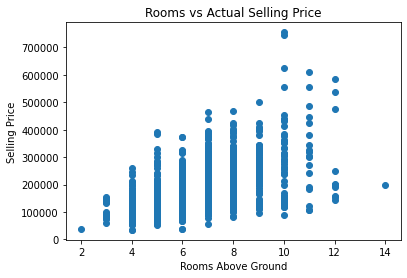

In [419]:
# Creating some plots to visualize different features vs outcome variable
mpplt.scatter(DF_housingData['TotRmsAbvGrd'], DF_housingData['SalePrice'])
mpplt.xlabel('Rooms Above Ground')
mpplt.ylabel('Selling Price')
mpplt.title('Rooms vs Actual Selling Price')

Text(0.5, 1.0, 'Garage Car Capacity vs Actual Selling Price')

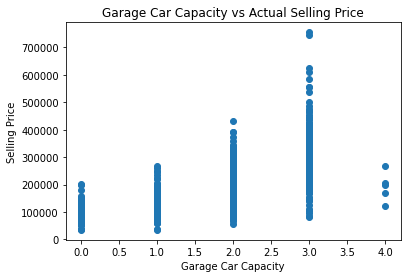

In [420]:
mpplt.scatter(DF_housingData['GarageCars'], DF_housingData['SalePrice'])
mpplt.xlabel('Garage Car Capacity')
mpplt.ylabel('Selling Price')
mpplt.title('Garage Car Capacity vs Actual Selling Price')

Text(0.5, 1.0, 'Square Feet Above Ground vs Actual Selling Price')

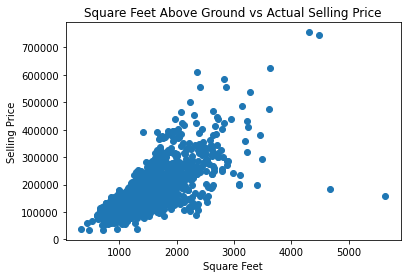

In [421]:
mpplt.scatter(DF_housingData['GrLivArea'], DF_housingData['SalePrice'])
mpplt.xlabel('Square Feet')
mpplt.ylabel('Selling Price')
mpplt.title('Square Feet Above Ground vs Actual Selling Price')

Text(0.5, 1.0, 'Overall Quality vs Actual Selling Price')

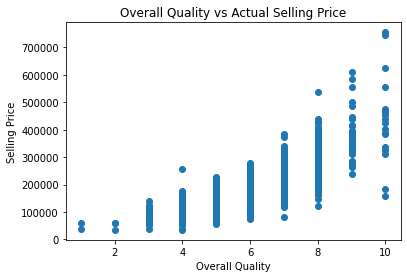

In [422]:
mpplt.scatter(DF_housingData['OverallQual'], DF_housingData['SalePrice'])
mpplt.xlabel('Overall Quality')
mpplt.ylabel('Selling Price')
mpplt.title('Overall Quality vs Actual Selling Price')

Text(0.5, 1.0, 'YearBuilt vs Actual Selling Price')

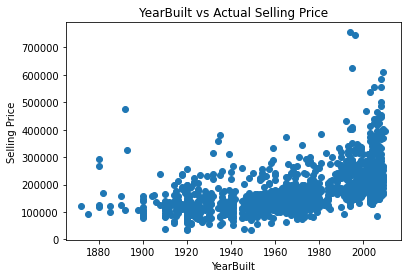

In [423]:
mpplt.scatter(DF_housingData['YearBuilt'], DF_housingData['SalePrice'])
mpplt.xlabel('YearBuilt')
mpplt.ylabel('Selling Price')
mpplt.title('YearBuilt vs Actual Selling Price')

Text(0.5, 1.0, 'Year Built vs Actual Selling Price')

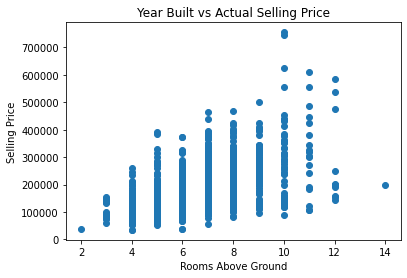

In [424]:
mpplt.scatter(DF_housingData['TotRmsAbvGrd'], DF_housingData['SalePrice'])
mpplt.xlabel('Rooms Above Ground')
mpplt.ylabel('Selling Price')
mpplt.title('Year Built vs Actual Selling Price')

Text(0.5, 1.0, 'First Floor Square Feet vs Actual Selling Price')

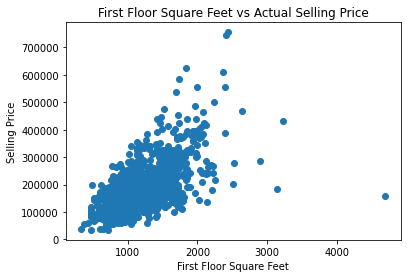

In [425]:
mpplt.scatter(DF_housingData['1stFlrSF'], DF_housingData['SalePrice'])
mpplt.xlabel('First Floor Square Feet')
mpplt.ylabel('Selling Price')
mpplt.title('First Floor Square Feet vs Actual Selling Price')

In [426]:
# Need to perform regression diagnositics to deterime accuracy of coefficients
Y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [427]:
# R^2 indicates degree to which data variance is explained by the model aka goodness of fit
# R^2 value closer to 1 is preferred
from sklearn.metrics import r2_score # needed for determining rss
r2 = r2_score(Y_train, y_train_predict)
r2

0.7564711221318555

In [428]:
import statsmodels.api as statm 
# Constant is not added by default thus using add_constant 
X_train = statm.add_constant(X_train) 
housing_model_statm = statm.OLS(Y_train, X_train)
results = housing_model_statm.fit()


In [429]:
# Checking R-squared produced via Ordinary Least Squares regression of statsmodels library
# R-squared: 0.756, this is similar to 0.7564711 produced from sklearn r2_score
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:53:58   Log-Likelihood:                -15738.
No. Observations:                1314   AIC:                         3.149e+04
Df Residuals:                    1306   BIC:                         3.153e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.533e+05   9.56e+04     -8.929   

Text(0.5, 1.0, 'Real vs Predicted Sales Price Values')

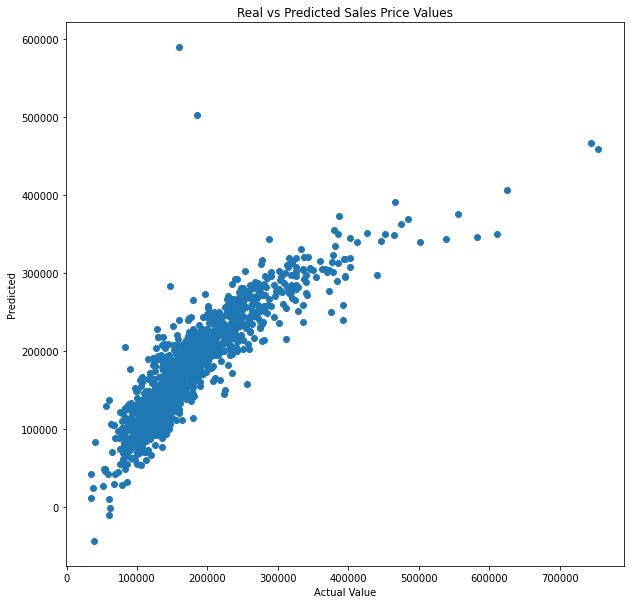

In [430]:
# Creating plot to visualize actual vs predicted data
mpplt.figure(figsize=(10,10))
mpplt.scatter(Y_train, y_train_predict)
mpplt.xlabel('Actual Value')
mpplt.ylabel('Predicted')
mpplt.title('Real vs Predicted Sales Price Values')


In [431]:
# Trying model again with more features (with less correlation) to compare resulting accuracy with original
DF_housingDataExpanded = DF_housingData[['OverallQual','GrLivArea','GarageCars','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt',
                     'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'LotFrontage', 'SalePrice']]
# dropna used to remove rows containing NaN data
DF_housingDataExpanded = DF_housingDataExpanded.dropna()
X2 = DF_housingDataExpanded[['OverallQual','GrLivArea','GarageCars','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt',
                     'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'LotFrontage']]

Y2 = DF_housingDataExpanded[['SalePrice']]
# Assigning random_state to obtain consistency
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.10, random_state=2)
lin_r_model2 = LinearRegression()
X2_train = X2_train.dropna() # Ensuring no NaN entrys 
Y2_train = Y2_train.dropna() 

lin_r_model2.fit(X2_train, Y2_train) 
y_train_predict2 = lin_r_model2.predict(X2_train) 
mean_squared_error(y_train_predict2, Y2_train)


1591044052.581372

In [432]:
# coefficients aka weighting of each feature
lin_r_model2.coef_

array([[ 2.18633716e+04,  4.01129740e+01,  1.78720783e+04,
         8.51053035e+00, -2.63567472e+03,  4.91722458e+02,
         3.03881240e+02,  1.61753647e+01,  1.12245404e+01,
         3.39714860e+01,  9.70654660e+03,  4.25562536e+01]])

In [433]:
# intercept of second model
lin_r_model2.intercept_

array([-706303.78461127])

In [434]:
mean_absolute_error(y_train_predict2, Y2_train)

25602.957681406107

In [435]:
# Checking range of SalePrice to better interpret mean_absolute_error
Y2.describe()

,SalePrice
count,1121.000000
mean,185506.152542
std,82999.159004
min,35311.000000
25%,131000.000000
50%,164900.000000
75%,219500.000000
max,755000.000000


In [436]:
lin_r_model2.score(X2_test, Y2_test) # Accuracy ~ 75.72%

0.7572278377214721

In [437]:
# R2 score of second model 
r2_take2 = r2_score(Y2_train, y_train_predict2)
r2_take2

0.7707959268227764

In [438]:
# Constant is not added by default thus using add_constant 
X2_train = statm.add_constant(X2_train) 
housing_model_statm2 = statm.OLS(Y2_train, X2_train)
results = housing_model_statm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     278.8
Date:                Sun, 20 Jun 2021   Prob (F-statistic):          3.67e-308
Time:                        02:53:59   Log-Likelihood:                -12109.
No. Observations:                1008   AIC:                         2.424e+04
Df Residuals:                     995   BIC:                         2.431e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.063e+05   1.43e+05     -4.952   

Text(0.5, 1.0, 'Real vs Predicted Sales Price Values (Expanded Feature Set)')

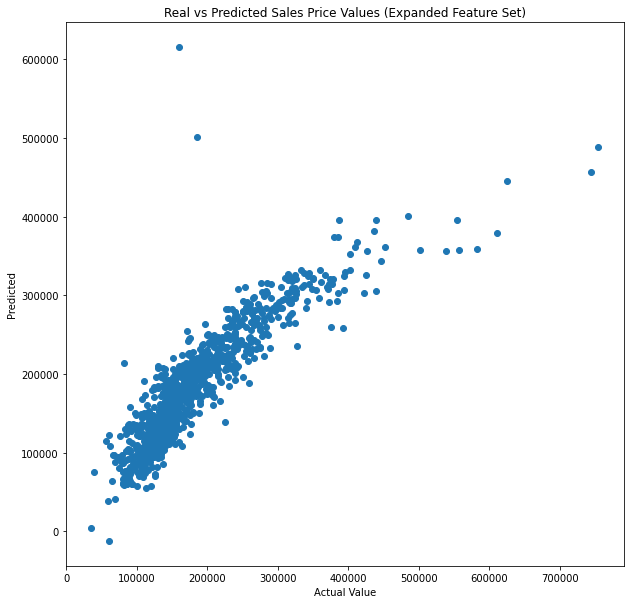

In [439]:
mpplt.figure(figsize=(10,10))
mpplt.scatter(Y2_train, y_train_predict2)
mpplt.xlabel('Actual Value')
mpplt.ylabel('Predicted')
mpplt.title('Real vs Predicted Sales Price Values (Expanded Feature Set)')

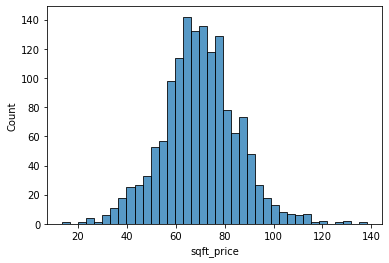

In [440]:
# Creating price per square foot column for further data exploration
DF_housingData2 = DF_housingData.copy()
DF_housingData2['sqft_price'] = DF_housingData['SalePrice']/(DF_housingData['GrLivArea'] + DF_housingData['TotalBsmtSF'])
seaborn.histplot(DF_housingData2['sqft_price'])

In [441]:
# Further model tuning may be performed by data normalization to account for anomalies 
DF_housingData2['sqft_price'].describe()

count    1460.000000
mean       69.807323
std        15.458304
min        13.614704
25%        60.326904
50%        69.505571
75%        78.933368
max       138.125440
Name: sqft_price, dtype: float64